In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import folium as fl
from selenium import webdriver
from tqdm import tqdm_notebook as tqdmn
from selenium.webdriver.common.by import By
import csv
import json
import datetime as dt


In [5]:
df = pd.read_csv('data\drom_archive_2018-2023.csv')
pd.set_option('display.max_columns', None)
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\555455455.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('data\drom_archive_2018-2023.csv')
C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\555455455.py:1: DtypeWarning: Columns (6,13,16,17,18,19,20,21,22,23,28,29,30,31,33,34,35,36,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data\drom_archive_2018-2023.csv')


Название машины   Год  \
0                        BMW X6  2017   
1                        BMW X6  2017   
2                        BMW X6  2017   
3                        BMW X6  2017   
4                        BMW X6  2017   
...                         ...   ...   
5397164           Ford Explorer  2008   
5397165             Toyota Vitz  2010   
5397166  Toyota Sprinter Marino  1992   
5397167             Toyota Wish  2005   
5397168       Volkswagen Passat  2002   

                                                    Ссылка  \
0         https://auto.drom.ru/surgut/bmw/x6/29345346.html   
1        https://auto.drom.ru/barnaul/bmw/x6/28319308.html   
2        https://auto.drom.ru/rostov-na-donu/bmw/x6/294...   
3        https://auto.drom.ru/novosibirsk/bmw/x6/266481...   
4        https://auto.drom.ru/barnaul/bmw/x6/29113964.html   
...                                                    ...   
5397164  https://auto.drom.ru/zheleznogorsk-krasnoyarsk...   
5397165  https://auto.drom.ru/zheleznogorsk-krasnoyarsk...   
5397166  https://auto.drom.ru/zima/toyota/sprinter_mari...   
5397167  https://auto.drom.ru/zmeinogorsk/toyota/wish/3...   
5397168  https://auto.drom.ru/zuya/volkswagen/passat/47...   

        Дата размещения объявления       Цена  Кол-во просмотров Скрыто  \
0                       2018-03-29  4630000.0             1188.0    1.0   
1                       2018-04-09  4310000.0             1259.0    0.0   
2                       2018-04-12  4450000.0              528.0    0.0   
3                       2018-04-13  5270000.0             1200.0    1.0   
4                       2018-04-18  4690000.0              888.0    1.0   
...                            ...        ...                ...    ...   
5397164                 2019-04-16   850000.0             1055.0    1.0   
5397165                 2021-07-09   429000.0              323.0    1.0   
5397166                 2021-04-04    93000.0             1221.0    1.0   
5397167                 2019-04-20   480000.0             1195.0    0.0   
5397168                 2022-07-16   335000.0              348.0    1.0   

         Объем двигателя Тип двигателя  Мощность Коробка передач    Привод  \
0                    3.0        дизель     313.0            АКПП       4WD   
1                    3.0        бензин     306.0            АКПП       4WD   
2                    3.0        дизель     249.0            АКПП       4WD   
3                    3.0        дизель     249.0            АКПП       4WD   
4                    3.0        дизель     313.0            АКПП       4WD   
...                  ...           ...       ...             ...       ...   
5397164              4.6        бензин     292.0            АКПП       4WD   
5397165              1.0        бензин      71.0        вариатор  передний   
5397166              1.6        бензин     115.0            АКПП  передний   
5397167              1.8        бензин     132.0            АКПП  передний   
5397168              1.8        бензин     150.0            АКПП  передний   

           Пробег    Руль  Поколение  Рестайлинг      Цвет  \
0             0.0   левый        2.0         0.0       NaN   
1             0.0   левый        2.0         0.0       NaN   
2          1500.0   левый        2.0         0.0       NaN   
3             0.0   левый        2.0         0.0       NaN   
4             0.0   левый        2.0         0.0       NaN   
...           ...     ...        ...         ...       ...   
5397164   93456.0   левый        4.0         0.0    черный   
5397165  109500.0  правый        2.0         0.0  бордовый   
5397166       NaN  правый        1.0         0.0   красный   
5397167  170000.0  правый        1.0         0.0     серый   
5397168  320000.0   левый        5.0         0.0     серый   

                               Комплектация  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397169 entries, 0 to 5397168
Data columns (total 41 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Название машины             object 
 1   Год                         int64  
 2   Ссылка                      object 
 3   Дата размещения объявления  object 
 4   Цена                        float64
 5   Кол-во просмотров           float64
 6   Скрыто                      object 
 7   Объем двигателя             float64
 8   Тип двигателя               object 
 9   Мощность                    float64
 10  Коробка передач             object 
 11  Привод                      object 
 12  Пробег                      float64
 13  Руль                        object 
 14  Поколение                   float64
 15  Рестайлинг                  float64
 16  Цвет                        object 
 17  Комплектация                object 
 18  Владелец                    object 
 19  Особые отметки       

Очистка данных

Удаление столбцов, которые не содержат полезных данных

In [7]:
df = df.drop(columns=["Тип кузова", "VIN", "Номер кузова", "Грузоподъемность", "Категория ТС", "Длина кузова", "Тип техники", "Количество мест",
                      "Масса", "Количество осей", "Объем кузова", "Тип кабины", "Рефрижератор", "Топливо", "Спальник", "Колёсная формула", "Проверено"])

In [8]:
df['Дата размещения объявления'] = pd.to_datetime(df['Дата размещения объявления'])

In [34]:
df['Особые отметки'].fillna('Нет', inplace=True)

C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\636554373.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Цель**: Выявить 5 самых продаваемых автомобилей

In [1]:
most_resale_percent = df['Название машины'].value_counts(normalize=True)[:5]

NameError: name 'df' is not defined

In [10]:
most_resale = (df['Название машины'].value_counts()[:5]) // 1000

В численном формате:

C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\3529403702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(most_resale, palette= ['green'] + ['lightgreen'] * 4)


<Axes: xlabel='Марка и модель автомобиля', ylabel='Количество объявлений, тыс.'>

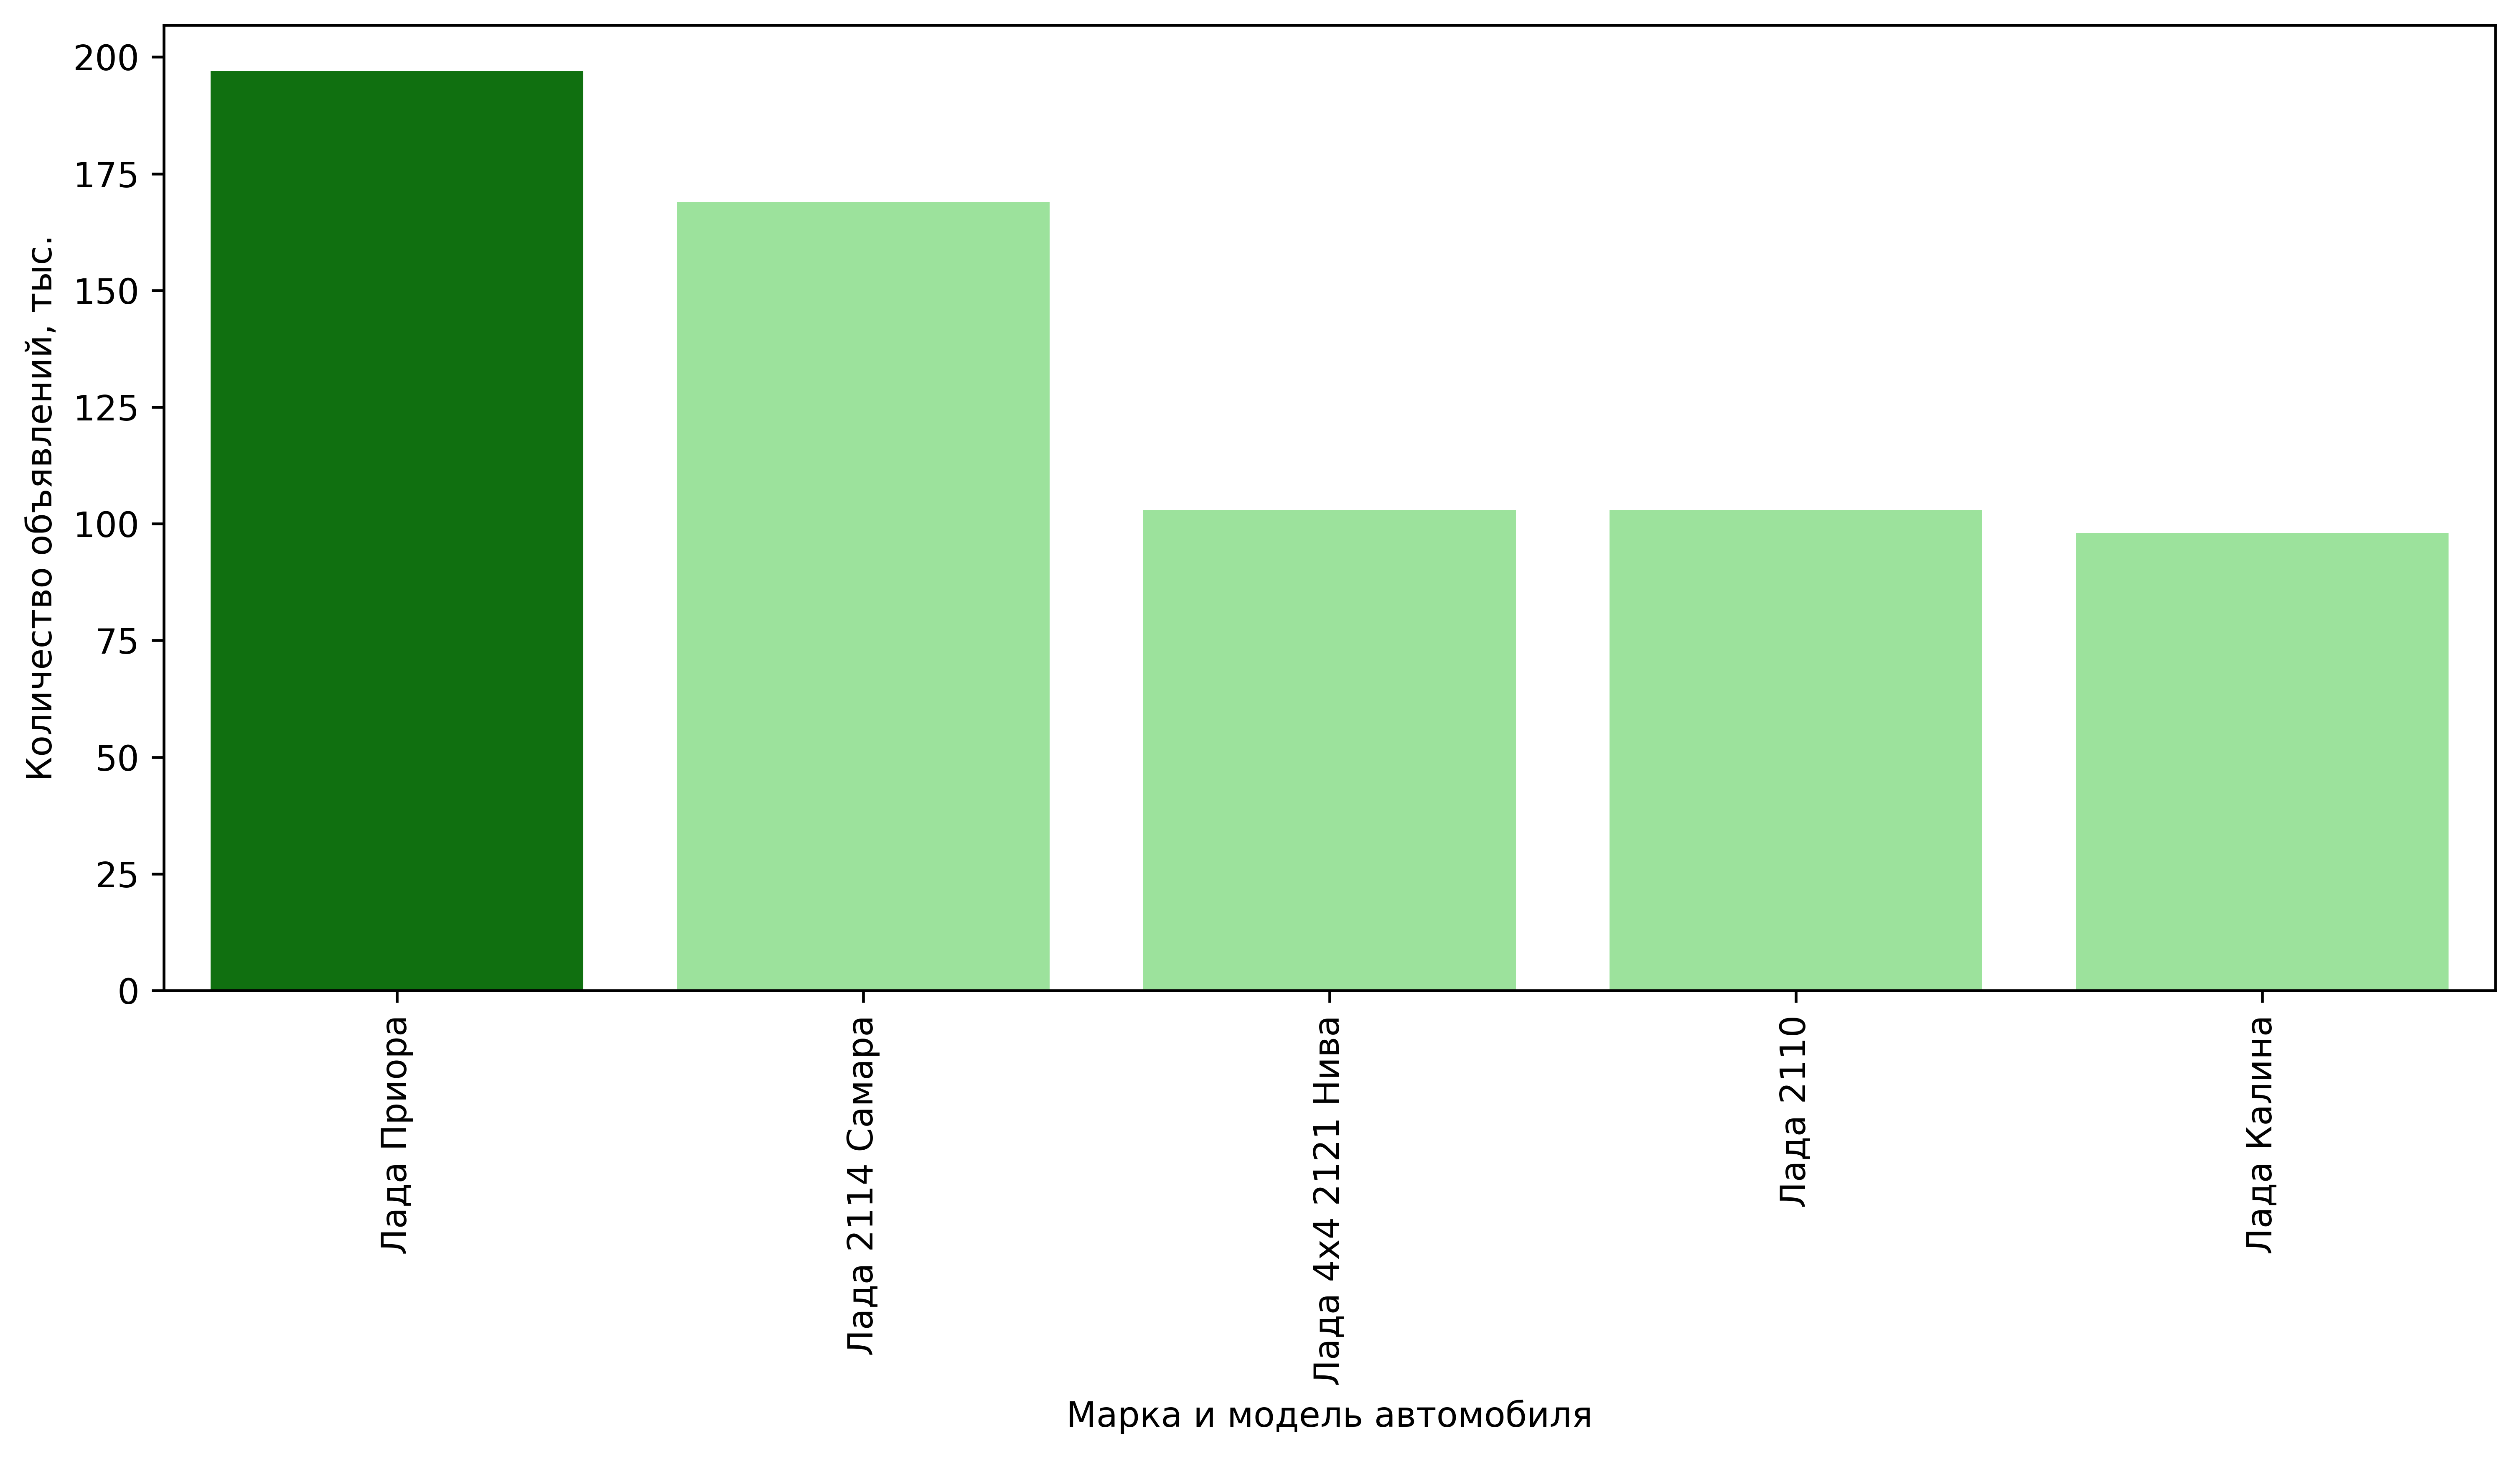

In [11]:
plt.figure(figsize=(12, 5), dpi= 600)
plt.xticks(rotation=90)
plt.ylabel('Количество объявлений, тыс.')
plt.xlabel('Марка и модель автомобиля')
sns.barplot(most_resale, palette= ['green'] + ['lightgreen'] * 4)

В процентах относительно общего количества продаж:

C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\3749685062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(most_resale_percent, palette= ['green'] + ['lightgreen'] * 4);


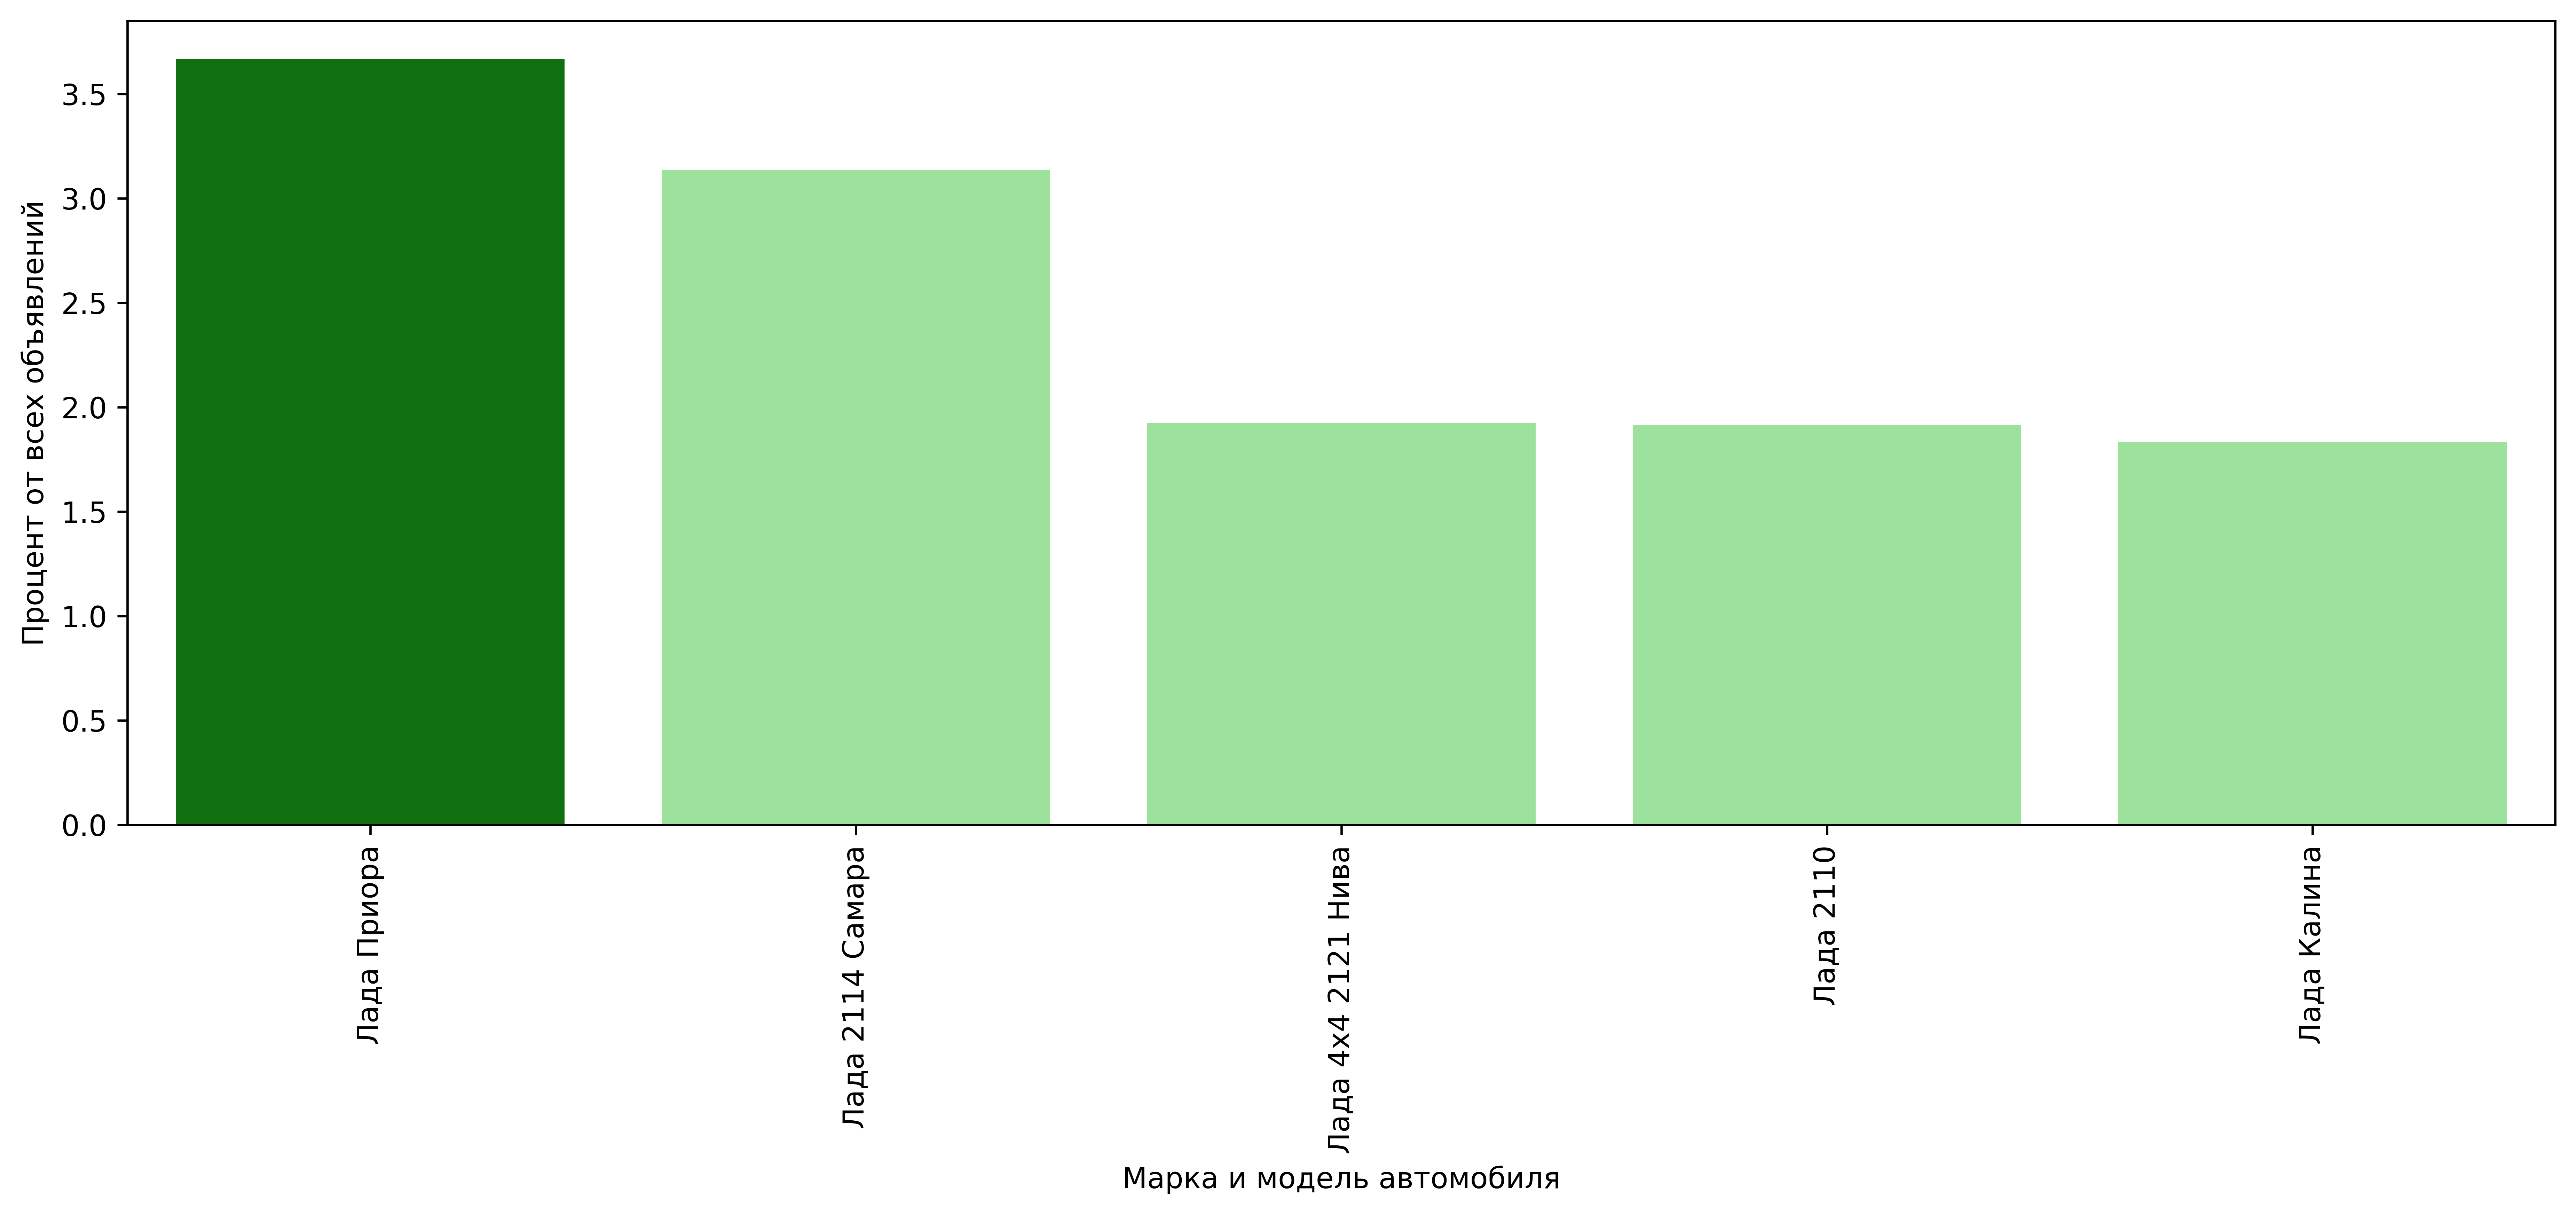

In [12]:
plt.figure(figsize=(15, 5), dpi= 600)
plt.xticks(rotation=90)
plt.ylabel('Процент от всех объявлений')
plt.xlabel('Марка и модель автомобиля')
sns.barplot(most_resale_percent, palette= ['green'] + ['lightgreen'] * 4);

**Вывод**: Самый продаваемый автомобиль по России - Лада Приора. Процент Лады Приоры от общего количества продаж - более 3.5 процентов, что в числах - около 200 тысяч объявлений. Это может быть связано с тем, что Лада Приора - отечественный автомобиль, который в своем ценовом сегменте имеет ряд преимуществ над конкурентами.

In [13]:
df1 = df.copy()
df1 = df1[df1['Название машины'] == 'Лада Приора']
df1

Название машины   Год  \
3445731     Лада Приора  2013   
3445737     Лада Приора  2013   
3445738     Лада Приора  2013   
3445740     Лада Приора  2013   
3445762     Лада Приора  2013   
...                 ...   ...   
5390430     Лада Приора  2011   
5390437     Лада Приора  2013   
5390441     Лада Приора  2010   
5390444     Лада Приора  2009   
5397038     Лада Приора  2009   

                                                    Ссылка  \
3445731  https://auto.drom.ru/abakan/lada/priora/462212...   
3445737  https://auto.drom.ru/aktanish/lada/priora/4930...   
3445738  https://auto.drom.ru/alhan-kala/lada/priora/49...   
3445740  https://auto.drom.ru/almetievsk/lada/priora/52...   
3445762  https://auto.drom.ru/argun/lada/priora/5313574...   
...                                                    ...   
5390430  https://auto.drom.ru/votkinsk/lada/priora/4893...   
5390437  https://auto.drom.ru/yaroslavl/lada/priora/347...   
5390441  https://auto.drom.ru/zheleznogorsk-krasnoyarsk...   
5390444  https://auto.drom.ru/zlatoust/lada/priora/2896...   
5397038  https://auto.drom.ru/ufa/lada/priora/49556335....   

        Дата размещения объявления      Цена  Кол-во просмотров Скрыто  \
3445731                 2022-08-02  390000.0              540.0    1.0   
3445737                 2022-12-20  410000.0              138.0    1.0   
3445738                 2022-12-14  390000.0               44.0    1.0   
3445740                 2023-09-05  420000.0              127.0    1.0   
3445762                 2023-10-25  470000.0               72.0    1.0   
...                            ...       ...                ...    ...   
5390430                 2022-11-15  220000.0               50.0    1.0   
5390437                 2019-07-21  277000.0              506.0    0.0   
5390441                 2018-02-06  250000.0              395.0    1.0   
5390444                 2018-04-16  215000.0              645.0    1.0   
5397038                 2023-02-19  260000.0              142.0    1.0   

         Объем двигателя Тип двигателя  Мощность Коробка передач    Привод  \
3445731              1.6        бензин      98.0        механика  передний   
3445737              1.6        бензин      98.0        механика  передний   
3445738              1.6        бензин      98.0        механика  передний   
3445740              1.6        бензин      98.0        механика  передний   
3445762              1.6        бензин      98.0        механика  передний   
...                  ...           ...       ...             ...       ...   
5390430              1.6        бензин      98.0        механика  передний   
5390437              1.6        бензин      98.0        механика  передний   
5390441              1.6        бензин      98.0        механика  передний   
5390444              1.6        бензин      98.0        механика  передний   
5397038              1.6        бензин      98.0        механика  передний   

           Пробег   Руль  Поколение  Рестайлинг        Цвет  \
3445731  160000.0  левый        1.0         0.0  коричневый   
3445737  119190.0  левый        1.0         0.0  коричневый   
3445738  207000.0  левый        1.0         0.0  коричневый   
3445740  130562.0  левый        1.0         0.0  коричневый   
3445762       NaN  левый        1.0         0.0  коричневый   
...           ...    ...        ...         ...         ...   
5390430   97387.0  левый        1.0         0.0      черный   
5390437  135000.0  левый        1.0         0.0      черный   
5390441  125000.0  левый        1.0         0.0       серый   
5390444  100000.0  левый        1.0         0.0     зеленый   
5397038  174000.0  левый        1.0         0.0       белый   

                      Комплектация                           Владелец  \
3445731   1.6 MT Люкс 21703-33-046         Собственник3 года на Дроме   
3445737   1.6 MT Люкс 21703-33-046        Частное лицо4 года на Дроме   
3445738                        NaN        Частное лицо2 года на 

In [14]:
df1['Особые отметки'].fillna('Нет', inplace=True)

C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\149407724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Особые отметки'].fillna('Нет', inplace=True)


In [15]:
px.box(df1[(df1['Особые отметки'] == 'Нет')]['Цена'])

Данный график собран по всей выборке, ниже - за 2023 год

In [ ]:
px.box(df1[(df1['Дата размещения объявления'].dt.year == 2023) & (df1['Особые отметки'] == 'Нет')]['Цена'])

Из боксплота мы видим, что медианная цена - 299 тысяч рублей, всего 25 процентов рынка имеют стоимость более 370 тысяч рублей. Также мы видим огромное количество выбросов, которые имеют право на существование, так как в автомобиль может быть вложено большое количество денег, его состояние может отличаться от заводского(поменян двигатель, проведено его усовершенствование, изменен салон, поставлена сигнализация и тд.) Стоит отметить, что в данной выборке автомобили берутся только целые.

In [17]:
px.scatter(df1.groupby(df1['Дата размещения объявления'].dt.year).agg({'Цена':'median'}))

Видно, что с 2021 по 2022 медианная стоимость значительно выросла(с 220 тысяч рублей до 255 тысяч рублей), а с 2022 по 2023 с 255 тысыч рублей, по 290 тысяч рублей. Давайте посмотрим этот диапазон по месяцам.

In [18]:
df_l = df1[df1['Дата размещения объявления'].dt.year >= 2020]
df_l['new_date'] = df['Дата размещения объявления'].dt.strftime('%Y-%m')
df_l


C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\1839112524.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Название машины   Год  \
3445731     Лада Приора  2013   
3445737     Лада Приора  2013   
3445738     Лада Приора  2013   
3445740     Лада Приора  2013   
3445762     Лада Приора  2013   
...                 ...   ...   
5390406     Лада Приора  2008   
5390407     Лада Приора  2011   
5390410     Лада Приора  2011   
5390430     Лада Приора  2011   
5397038     Лада Приора  2009   

                                                    Ссылка  \
3445731  https://auto.drom.ru/abakan/lada/priora/462212...   
3445737  https://auto.drom.ru/aktanish/lada/priora/4930...   
3445738  https://auto.drom.ru/alhan-kala/lada/priora/49...   
3445740  https://auto.drom.ru/almetievsk/lada/priora/52...   
3445762  https://auto.drom.ru/argun/lada/priora/5313574...   
...                                                    ...   
5390406  https://auto.drom.ru/uzhur/lada/priora/4322035...   
5390407  https://auto.drom.ru/velikovechnoe/lada/priora...   
5390410  https://auto.drom.ru/verhnyaya-pyshma/lada/pri...   
5390430  https://auto.drom.ru/votkinsk/lada/priora/4893...   
5397038  https://auto.drom.ru/ufa/lada/priora/49556335....   

        Дата размещения объявления      Цена  Кол-во просмотров Скрыто  \
3445731                 2022-08-02  390000.0              540.0    1.0   
3445737                 2022-12-20  410000.0              138.0    1.0   
3445738                 2022-12-14  390000.0               44.0    1.0   
3445740                 2023-09-05  420000.0              127.0    1.0   
3445762                 2023-10-25  470000.0               72.0    1.0   
...                            ...       ...                ...    ...   
5390406                 2021-07-08  179000.0             1066.0    1.0   
5390407                 2020-05-14  220000.0              646.0    0.0   
5390410                 2021-09-09  260000.0              379.0    1.0   
5390430                 2022-11-15  220000.0               50.0    1.0   
5397038                 2023-02-19  260000.0              142.0    1.0   

         Объем двигателя Тип двигателя  Мощность Коробка передач    Привод  \
3445731              1.6        бензин      98.0        механика  передний   
3445737              1.6        бензин      98.0        механика  передний   
3445738              1.6        бензин      98.0        механика  передний   
3445740              1.6        бензин      98.0        механика  передний   
3445762              1.6        бензин      98.0        механика  передний   
...                  ...           ...       ...             ...       ...   
5390406              1.6        бензин      98.0        механика  передний   
5390407              1.6        бензин      98.0        механика  передний   
5390410              1.6        бензин      98.0        механика  передний   
5390430              1.6        бензин      98.0        механика  передний   
5397038              1.6        бензин      98.0        механика  передний   

           Пробег   Руль  Поколение  Рестайлинг         Цвет  \
3445731  160000.0  левый        1.0         0.0   коричневый   
3445737  119190.0  левый        1.0         0.0   коричневый   
3445738  207000.0  левый        1.0         0.0   коричневый   
3445740  130562.0  левый        1.0         0.0   коричневый   
3445762       NaN  левый        1.0         0.0   коричневый   
...           ...    ...        ...         ...          ...   
5390406  219163.0  левый        1.0         0.0  серебристый   
5390407  190000.0  левый        1.0         0.0        белый   
5390410   97667.0  левый        1.0         0.0       черный   
5390430   97387.0  левый        1.0         0.0       черный   
5397038  174000.0  левый        1.0         0.0        белый   

                      Комплектация                     Владелец  \
3445731   1.6 MT Люкс 21703-33-046   Собственник3 года на Дроме   
3445737   1.6 MT Люкс 21703-33-046  Частное лицо4 года на Дроме   
3445738                        NaN  Частное лицо2 года на Дроме   
344

In [19]:
px.scatter(df_l.groupby(df_l['new_date']).agg({'Цена':'median'}))

Видно, как резко увеличилась цена за 2023 год, сейчас также продолжает расти. Колоссальный рост связан с началом СВО, уходом зарубежных компаний из России.

In [20]:
df['new_date'] = df_l['new_date'] = df['Дата размещения объявления'].dt.strftime('%Y-%m')

C:\Users\kpuck\AppData\Local\Temp\ipykernel_4148\1895670128.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
px.scatter(df[df['Дата размещения объявления'].dt.year >= 2022].groupby(df['new_date']).agg({'Цена':'median'}))

Заметим интересную тенденцию, что медианная цена по всему рынку растет не так стабильно, как цена на Ладу Приору. Пик приходится на июль 2023.

Тут стоит отметить, что я беру именно медианное значение, так как оно устойчиво к выбросам, в отличие от среднего. О наличии большого количества выбросов свидетельствует боксплот, приведенный ниже. Это связано с огромным количеством марок и моделей, а также продажей редких автомобилей.

Теперь узнаем конкурентов Лады Приоры (по ценовому сегменту)

In [ ]:
segment = df_l['Цена'].median()
segment
standart = df_l['Цена'].std()
standart
minim, maxi = segment - standart, segment + standart

130132.50623818979 349867.49376181024


Возьмем только исправные машины, так как зачастую, цена неисправных автомобилей - выброс

In [37]:
df1 = df[df['Особые отметки'] == 'Нет']
df1 = df1.groupby(df['Название машины']).agg({'Цена':'median', 'Название машины':'count'})
df1 = df1[(df1['Цена'] >= minim) & (df1['Цена'] <= maxi)]

In [38]:
df1

Цена  Название машины
Название машины                             
Audi A2            300000.0               83
Audi Coupe         155555.5               42
Audi Quattro       330000.0               15
Audi V8            180000.0               35
BMW 340            300000.0                7
...                     ...              ...
Лада Гранта        280000.0            59849
Лада Калина        200000.0            95785
Лада Калина Спорт  250000.0             4245
Лада Нива Пикап    225000.0              271
Лада Приора        235000.0           191270

[303 rows x 2 columns]

Первое преимущество над конкурентами - число объявлений (число предложений). Второе - год выпуска (все конкуренты намного старее, чем Лада Приора)